<br></br>
# **Konlpy - 한글**

## **1 Tagging**

In [1]:
from konlpy.tag import Twitter
twitter = Twitter()
twitter.pos('서울R&D캠퍼스 수업자료')

[('서울', 'Noun'),
 ('R', 'Alpha'),
 ('&', 'Punctuation'),
 ('D', 'Alpha'),
 ('캠퍼스', 'Noun'),
 ('수업', 'Noun'),
 ('자료', 'Noun')]

In [2]:
text = "워런 버핏은 삼성전자가 아닌 애플주식을 왜 샀을까"

In [3]:
%%time
print(twitter.pos(text, stem=True))

[('워런', 'Noun'), ('버핏', 'Noun'), ('은', 'Josa'), ('삼성', 'Noun'), ('전자', 'Noun'), ('가', 'Josa'), ('아니다', 'Adjective'), ('애플', 'Noun'), ('주식', 'Noun'), ('을', 'Josa'), ('왜', 'Noun'), ('사다', 'Verb')]
CPU times: user 635 ms, sys: 19 ms, total: 654 ms
Wall time: 254 ms


In [4]:
%%time
print(twitter.pos(text))

[('워런', 'Noun'), ('버핏', 'Noun'), ('은', 'Josa'), ('삼성', 'Noun'), ('전자', 'Noun'), ('가', 'Josa'), ('아닌', 'Adjective'), ('애플', 'Noun'), ('주식', 'Noun'), ('을', 'Josa'), ('왜', 'Noun'), ('샀', 'Verb'), ('을까', 'Eomi')]
CPU times: user 36.5 ms, sys: 4.01 ms, total: 40.5 ms
Wall time: 20.5 ms


In [5]:
%%time
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.pos(text))

[('워', 'UN'), ('런', 'NNG'), ('버핏', 'UN'), ('은', 'JX'), ('삼성전자', 'NNG'), ('가', 'JKS'), ('아니', 'VV'), ('ㄴ', 'ETD'), ('애플', 'NNP'), ('주식', 'NNG'), ('을', 'JKO'), ('왜', 'MAG'), ('사', 'VV'), ('었', 'EPT'), ('을까', 'EFQ')]
CPU times: user 17 s, sys: 212 ms, total: 17.2 s
Wall time: 6.21 s


In [6]:
%%time
from konlpy.tag import Hannanum
han = Hannanum()
print(han.pos(text))

[('워런', 'N'), ('버핏', 'N'), ('은', 'J'), ('삼성전자', 'N'), ('가', 'J'), ('아니', 'P'), ('ㄴ', 'E'), ('애플주식', 'N'), ('을', 'J'), ('왜', 'M'), ('사', 'P'), ('아ㄹ까', 'E')]
CPU times: user 8.09 s, sys: 80.4 ms, total: 8.17 s
Wall time: 2.47 s


<br></br>
# **Word Cloud - 말뭉치 응용**

## **1 Word Cloud**

In [7]:
f     = open('./data/kr-Report_2018.txt', 'r', encoding='utf-8')
texts = f.read()
f.close()
texts[:100]

'삼성전자\n지속가능경영보고서\n2018\nINSPIRE\nTHE WORLD\nCREATE\nTHE FUTURE\nINSPIRE THE WORLD\nABOUT THIS REPORT\n보고서 개요\n삼'

(-0.5, 399.5, 199.5, -0.5)

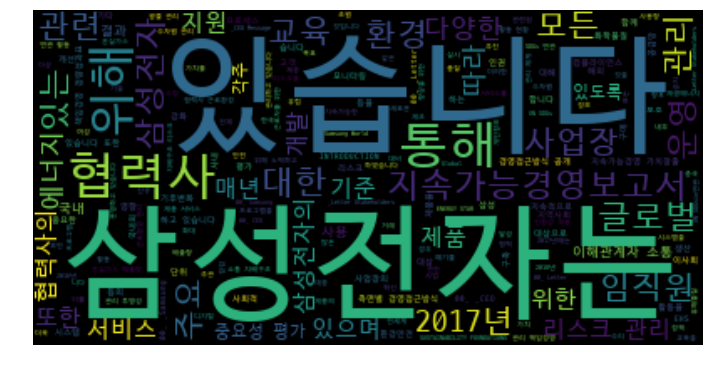

In [8]:
%matplotlib inline
from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf',relative_scaling = 0.2).generate(texts)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

<br></br>
## **2 명사만 추출**

In [9]:
from konlpy.tag import Twitter
twitter = Twitter()
twitter.nouns('지속가능경영을 삼성전자에서')

['지속', '가능', '경영', '삼성', '전자']

In [10]:
def txt_to_nouns(texts):
    import re
    texts  = texts.replace('\n', ' ')
    hangul = re.compile(r'[^ 가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자 추출
    result = hangul.sub('', texts)    # 추출한 내용을 '' 로 치환한다

    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(result)

    from konlpy.tag import Twitter
    twitter, result = Twitter(), []

    for token in tokens:
        temp = twitter.nouns(token)
        if len("".join(temp)) > 1: 
            result.append("".join(temp))
    return " ".join(result)

In [11]:
txt_to_nouns('지속가능경영을 삼성전자에서 갤럭시(Galaxy)노트9')

'지속가능경영 삼성전자 갤럭시노트'

(-0.5, 399.5, 199.5, -0.5)

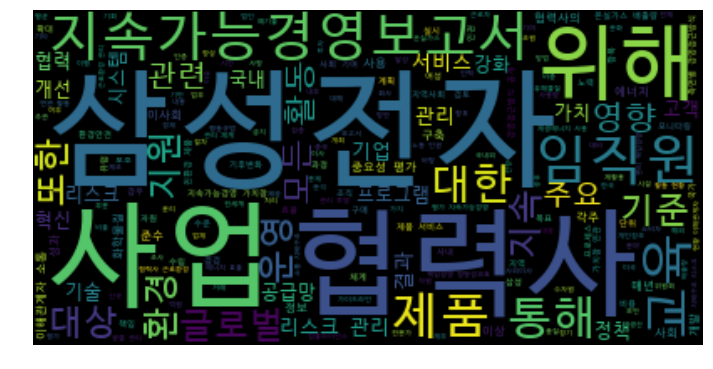

In [12]:
%matplotlib inline
from wordcloud import WordCloud
text_noun = txt_to_nouns(texts)
wcloud    = WordCloud('./data/D2Coding.ttf',relative_scaling = 0.2).generate(text_noun)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

In [13]:
# 명사추출 후 Token 빈도결과값
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import pandas as pd
freqtxt = pd.Series(dict(FreqDist(word_tokenize(text_noun)))).sort_values(ascending=False)
freqtxt[:20]

삼성전자         338
관리           306
제품           261
협력사          231
사업           213
임직원          162
위해           161
활동           148
리스크          144
교육           139
대한           129
지속가능경영보고서    125
통해           124
사회           119
환경           115
서비스          112
평가           108
글로벌          107
인권            96
영향            95
dtype: int64